In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import Image, display_png
from tqdm import tqdm_notebook as tqdm
import PIL.Image

In [3]:
import pathlib

import numpy as np
import sklearn.externals.joblib as joblib

import pytoolkit as tk
from lib import data, generator, evaluation

In [4]:
X, d, y = data.load_train_data()
Xy = np.concatenate([X, y], axis=-1)

In [5]:
mask = X.max(axis=(1, 2, 3)) != 0  # 真っ黒画像を除外(なぜか結構ある。。)
Xy_l = Xy[mask, :, :2, :]
Xy_r = Xy[mask, :, -2:, :]
Xy_t = Xy[mask, :2, :, :]
Xy_b = Xy[mask, -2:, :, :]

In [6]:
import itertools
indices1, indices2 = zip(*list(itertools.permutations(range(len(X[mask])), 2)))
indices1 = np.array(indices1)
indices2 = np.array(indices2)

In [7]:
len(indices1)

15362480

In [42]:
BS = 10000
d_lr = np.concatenate([np.sqrt(np.sum(np.square(Xy_l[indices1[i:i + BS]] - Xy_r[indices2[i:i + BS]]), axis=(1, 2, 3))) for i in tk.tqdm(list(range(0, len(indices1), BS)))])
d_tb = np.concatenate([np.sqrt(np.sum(np.square(Xy_t[indices1[i:i + BS]] - Xy_b[indices2[i:i + BS]]), axis=(1, 2, 3))) for i in tk.tqdm(list(range(0, len(indices1), BS)))])

100%|###########################################################| 1537/1537 [00:26<00:00, 57.01it/s]


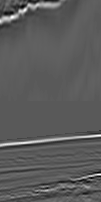

In [46]:
chk = np.where(d_tb <= 50)[0][20]

Xt = np.concatenate([X[mask][indices2[chk]], X[mask][indices1[chk]]], axis=0)
yt = np.concatenate([y[mask][indices2[chk]], y[mask][indices1[chk]]], axis=0)
PIL.Image.fromarray(np.squeeze(Xt.astype(np.uint8)))
#PIL.Image.fromarray(np.squeeze(yt.astype(np.uint8)))